## Machine Learning Model for default detection

### Objective
* Build machine learning models to accurately predict default for fraud detection, helping to make decisions on whether the loan should be approved

### Background 

* LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. Lending Club is the world's largest peer-to-peer lending platform. The company claims that 15.98 billion in loans had been originated through its platform up to December 31, 2015. Lending Club enables borrowers to create unsecured personal loans between 1,000 and 40,000. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee.

### Scenario Analysis

* Before a loan is issued to a borrower, lending club will collect information on a certain individual, generally including two aspects. The first one is personal information which includes age, sex, annual income, and etc. The second is information from third-party which includes FICO score, credit history, delinquency records, and etc. Lending club will then use a fraud detection model to predict whether this individual will default on loan, in order to make a final decision.

* First of all, we are interested in predicting whether the borrower will default on loans, which can be categorized as a binary classification problem. Therefore, supervised learning model should be used in this case.


*  Logistic Regression appears to be the first model we use should, which is easy to implement as well as interpreting.

### Preprocessing

In [170]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

from pyecharts import Pie

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [171]:
data = pd.read_csv('LoanStats_2018Q2.csv', encoding = 'latin-1', skiprows = 1)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,nan,10000.00000,10000.00000,10000.00000,36 months,20.39%,373.63000,D,D4,Realtor,3 years,OWN,26000.00000,Source Verified,Jun-2018,Current,n,nan,nan,debt_consolidation,Debt consolidation,058xx,VT,56.00000,0.00000,Apr-2005,0.00000,nan,nan,10.00000,0.00000,35130.00000,98.4%,16.00000,w,9589.10000,9589.10000,741.60000,741.60000,410.90000,330.70000,0.00000,0.00000,0.00000,Sep-2018,373.63000,Oct-2018,Sep-2018,0.00000,...,7.00000,8.00000,7.00000,10.00000,0.00000,0.00000,0.00000,1.00000,100.00000,100.00000,0.00000,0.00000,78151.00000,64253.00000,2200.00000,42451.00000,6881.00000,Apr-2005,0.00000,0.00000,5.00000,99.20000,1.00000,4.00000,0.00000,0.00000,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
1,NaN,nan,20000.00000,20000.00000,20000.00000,60 months,13.06%,455.68000,C,C1,Business Analyst,6 years,MORTGAGE,94000.00000,Verified,Jun-2018,Current,n,nan,nan,debt_consolidation,Debt consolidation,956xx,CA,22.29000,1.00000,Sep-2000,0.00000,21.00000,nan,12.00000,0.00000,51762.00000,69.9%,16.00000,w,19521.38000,19521.38000,882.34000,882.34000,478.62000,403.72000,0.00000,0.00000,0.00000,Sep-2018,455.68000,Oct-2018,Sep-2018,0.00000,...,10.00000,13.00000,10.00000,12.00000,0.00000,0.00000,0.00000,1.00000,93.80000,50.00000,0.00000,0.00000,554201.00000,69467.00000,55700.00000,25201.00000,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,DirectPay,N,NaN,NaN,NaN,nan,nan,nan
2,NaN,nan,14000.00000,14000.00000,14000.00000,60 months,10.56%,301.34000,B,B3,Product Manager,8 years,MORTGAGE,98000.00000,Not Verified,Jun-2018,Current,n,nan,nan,credit_card,Credit card refinancing,152xx,PA,16.02000,0.00000,Jun-2005,0.00000,nan,nan,12.00000,0.00000,21930.00000,32.3%,16.00000,w,13642.15000,13642.15000,586.25000,586.25000,357.85000,228.40000,0.00000,0.00000,0.00000,Sep-2018,301.34000,Oct-2018,Sep-2018,0.00000,...,8.00000,9.00000,5.00000,12.00000,0.00000,0.00000,0.00000,3.00000,100.00000,16.70000,0.00000,0.00000,277254.00000,76757.00000,63500.00000,79008.00000,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
3,NaN,nan,8000.00000,8000.00000,8000.00000,36 months,6.83%,246.40000,A,A3,City Attorney,2 years,MORTGAGE,144000.00000,Not Verified,Jun-2018,Current,n,nan,nan,debt_consolidation,Debt consolidation,

In [172]:
def count_null(column):
    return len(column[pd.isnull(column))

plt.figure(figsize = (15,8))
data.apply(count_null).sort_values(ascending = False).plot(kind = 'bar')
plt.title('Missing Value Count')
plt.show()

SyntaxError: invalid syntax (<ipython-input-172-154a4e18eefa>, line 2)

In [ ]:
# drop column with NA values greater than 50%
thresh = len(data) / 2
data = data.dropna(thresh = thresh, axis = 1)

In [ ]:
plt.figure(figsize = (15,8))
data.apply(count_null).sort_values(ascending = False).plot(kind = 'bar')
plt.title('Missing Value Count')
plt.show()

In [173]:
data.shape

(130774, 145)

* Number of variables reduced from 137 to 102

In [36]:
# Save to CSV file
data.to_csv('loan_data.csv', index = False)

### Readin Dataset

In [174]:
df = pd.read_csv('loan_data.csv')

In [175]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,...,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,10000.00000,10000.00000,10000.00000,36 months,20.39%,373.63000,D,D4,Realtor,3 years,OWN,26000.00000,Source Verified,Jun-2018,Current,n,debt_consolidation,Debt consolidation,058xx,VT,56.00000,0.00000,Apr-2005,0.00000,10.00000,0.00000,35130.00000,98.4%,16.00000,w,9589.10000,9589.10000,741.60000,741.60000,410.90000,330.70000,0.00000,0.00000,0.00000,Sep-2018,373.63000,Oct-2018,Sep-2018,0.00000,1.00000,Joint App,0.00000,0.00000,64253.00000,1.00000,...,1.00000,23.00000,29123.00000,69.00000,1.00000,6.00000,1103.00000,82.00000,35700.00000,0.00000,0.00000,1.00000,7.00000,6425.00000,133.00000,94.00000,0.00000,0.00000,158.00000,37.00000,1.00000,1.00000,1.00000,20.00000,12.00000,0.00000,2.00000,7.00000,2.00000,2.00000,7.00000,7.00000,8.00000,7.00000,10.00000,0.00000,0.00000,0.00000,1.00000,100.00000,100.00000,0.00000,0.00000,78151.00000,64253.00000,2200.00000,42451.00000,N,Cash,N
1,20000.00000,20000.00000,20000.00000,60 months,13.06%,455.68000,C,C1,Business Analyst,6 years,MORTGAGE,94000.00000,Verified,Jun-2018,Current,n,debt_consolidation,Debt consolidation,956xx,CA,22.29000,1.00000,Sep-2000,0.00000,12.00000,0.00000,51762.00000,69.9%,16.00000,w,19521.38000,19521.38000,882.34000,882.34000,478.62000,403.72000,0.00000,0.00000,0.00000,Sep-2018,455.68000,Oct-2018,Sep-2018,0.00000,1.00000,Individual,0.00000,0.00000,520838.00000,0.00000,...,0.00000,27.00000,17705.00000,70.00000,0.00000,1.00000,21516.00000,70.00000,74000.00000,0.00000,0.00000,1.00000,2.00000,43403.00000,10021.00000,82.00000,0.00000,0.00000,49.00000,213.00000,14.00000,8.00000,1.00000,14.00000,9.00000,0.00000,6.00000,10.00000,6.00000,6.00000,2.00000,10.00000,13.00000,10.00000,12.00000,0.00000,0.00000,0.00000,1.00000,93.80000,50.00000,0.00000,0.00000,554201.00000,69467.00000,55700.00000,25201.00000,N,DirectPay,N
2,14000.00000,14000.00000,14000.00000,60 months,10.56%,301.34000,B,B3,Product Manager,8 years,MORTGAGE,98000.00000,Not Verified,Jun-2018,Current,n,credit_card,Credit card refinancing,152xx,PA,16.02000,0.00000,Jun-2005,0.00000,12.00000,0.00000,21930.00000,32.3%,16.00000,w,13642.15000,13642.15000,586.25000,586.25000,357.85000,228.40000,0.00000,0.00000,0.00000,Sep-2018,301.34000,Oct-2018,Sep-2018,0.00000,1.00000,Individual,0.00000,0.00000,188168.00000,1.00000,...,2.00000,10.00000,54827.00000,89.00000,1.00000,1.00000,9202.00000,54.00000,68000.00000,1.00000,1.00000,1.00000,3.00000,17106.00000,41570.00000,34.50000,0.00000,0.00000,142.00000,156.00000,4.00000,4.00000,1.00000,4.00000,9.00000,0.00000,5.00000,5.00000,7.00000,7.00000,6.00000,8.00000,9.00000,5.00000,12.00000,0.00000,0.00000,0.00000,3.00

In [176]:
df.dtypes.value_counts()

float64    77
object     25
dtype: int64

* 77 variables are numerical and 25 variables are categorical

In [177]:
# drop column with a single values
df = df.loc[:,df.apply(pd.Series.nunique) != 1]
df.shape 

(130774, 98)

* 4 variables with 1 unique values were dropped

#### Missing Value - Categorical Variable

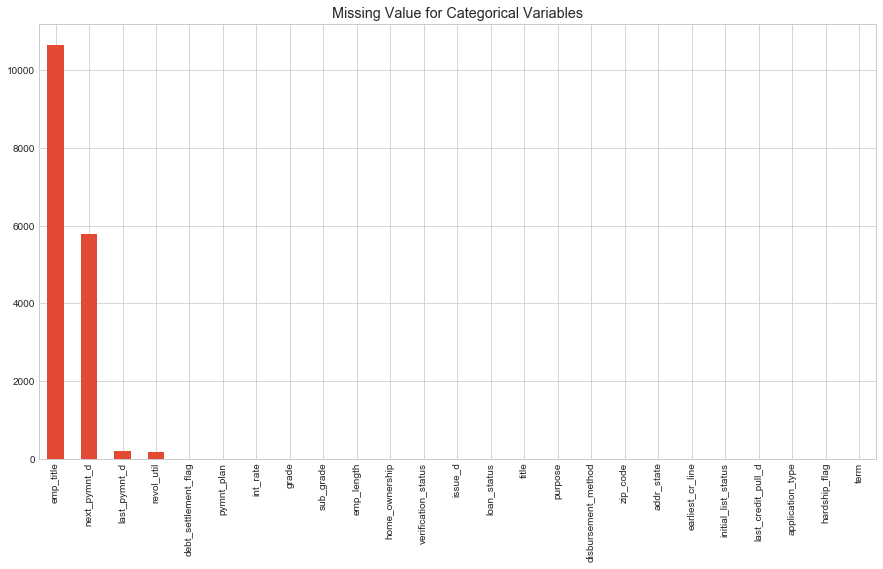

In [178]:
plt.figure(figsize = (15,8))
categorical = df.select_dtypes(include = ['object']).columns
df[categorical].isnull().sum().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Missing Value for Categorical Variables')
plt.show()

In [179]:
pd.set_option('display.max_columns', 100) # to allow all columns to be printed
df[categorical].head()

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,36 months,20.39%,D,D4,Realtor,3 years,OWN,Source Verified,Jun-2018,Current,n,debt_consolidation,Debt consolidation,058xx,VT,Apr-2005,98.4%,w,Sep-2018,Oct-2018,Sep-2018,Joint App,N,Cash,N
1,60 months,13.06%,C,C1,Business Analyst,6 years,MORTGAGE,Verified,Jun-2018,Current,n,debt_consolidation,Debt consolidation,956xx,CA,Sep-2000,69.9%,w,Sep-2018,Oct-2018,Sep-2018,Individual,N,DirectPay,N
2,60 months,10.56%,B,B3,Product Manager,8 years,MORTGAGE,Not Verified,Jun-2018,Current,n,credit_card,Credit card refinancing,152xx,PA,Jun-2005,32.3%,w,Sep-2018,Oct-2018,Sep-2018,Individual,N,Cash,N
3,36 months,6.83%,A,A3,City Attorney,2 years,MORTGAGE,Not Verified,Jun-2018,Current,n,debt_consolidation,Debt consolidation,750xx,TX,May-2001,7.4%,w,Sep-2018,Oct-2018,Sep-2018,Individual,N,Cash,N
4,60 months,17.47%,D,D1,Laborer,10+ years,OWN,Source Verified,Jun-2018,Current,n,credit_card,Credit card refinancing,476xx,IN,Mar-2003,60.1%,w,Sep-2018,Oct-2018,Sep-2018,Individual,N,DirectPay,N


In [180]:
# We notice int_rate, emp_length, revol_util should be numerical data type
df['int_rate'] = df['int_rate'].str.strip('%').astype('float')
df['revol_util'] = df['revol_util'].str.strip('%').astype('float')

categorical = df.select_dtypes(include = ['object']).columns

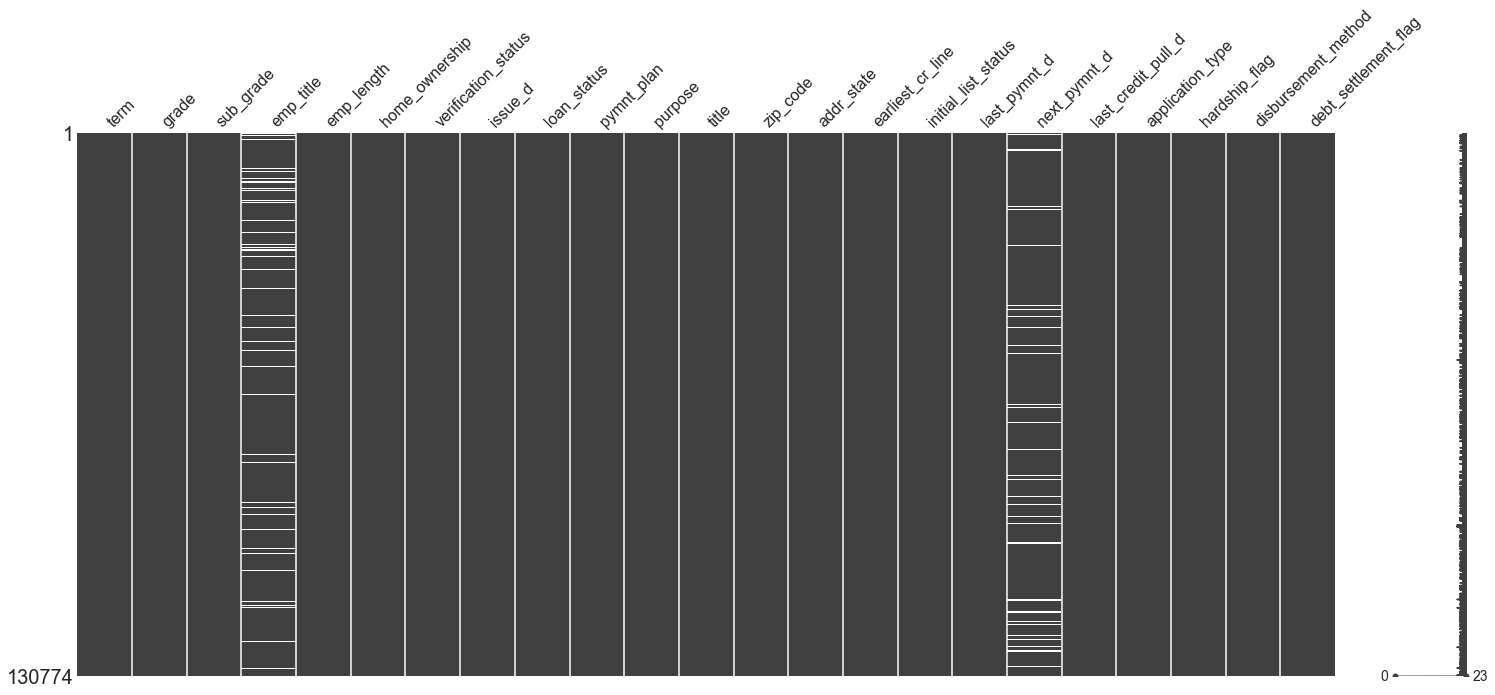

In [181]:
# Visualize missing values
msno.matrix(df[categorical])
plt.show()

* We see that `emp_title` and `next_pymnt_d` has most missing values, row 23 is the one with most missing values, and row 0 is the least

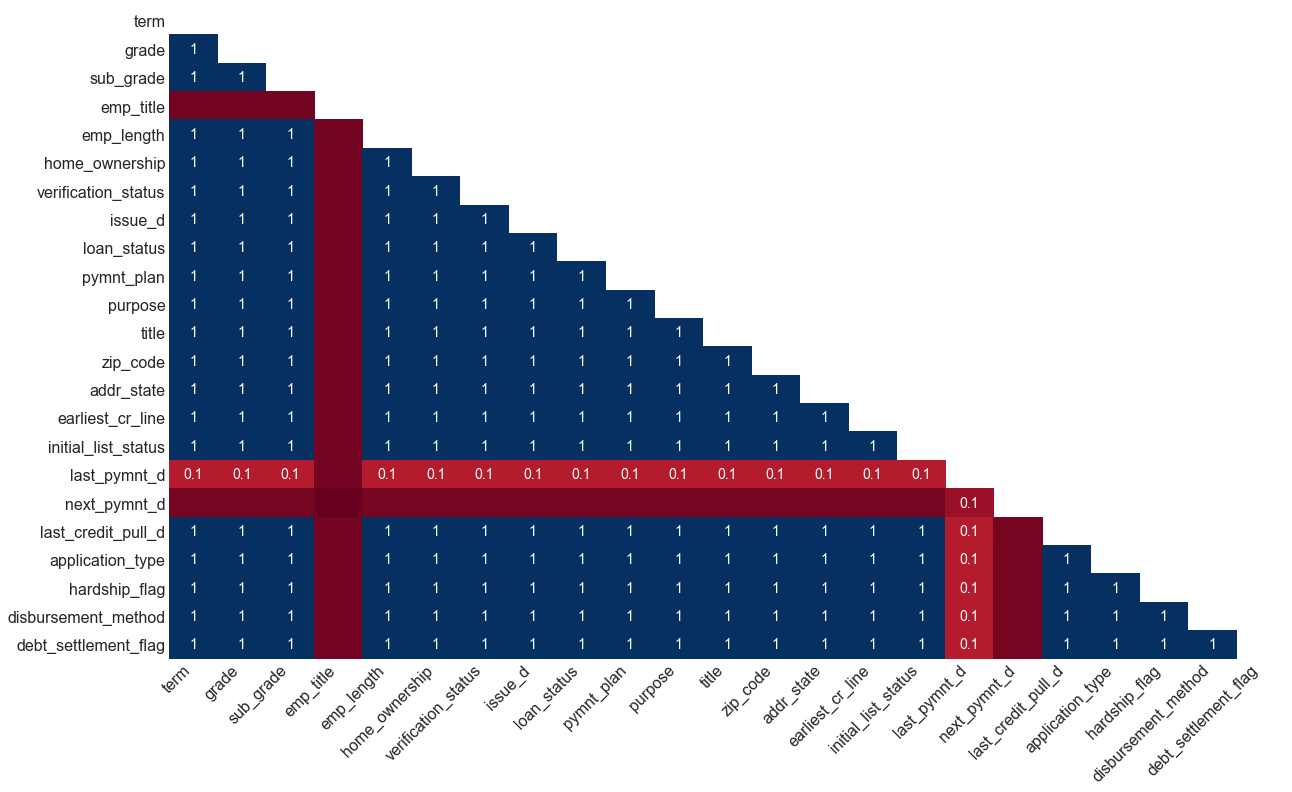

In [182]:
# check correlation between missing values
msno.heatmap(df[categorical])
plt.show() 

* The above plot shows the correlation between variables. A value of 1 or -1 show positive and negative correlation repectively. A correlation of 0 shows variables are not correlated. However, the heatmap has limited capability when the dataset is large.

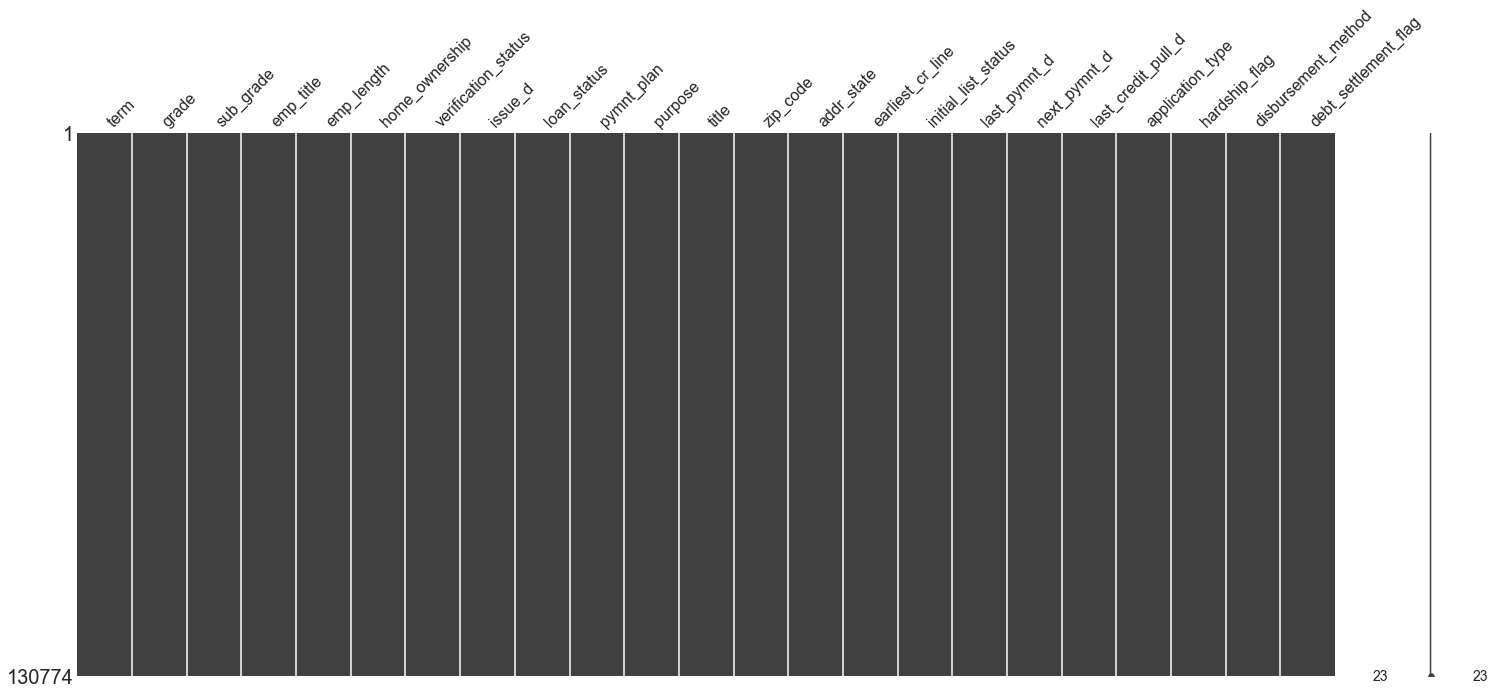

In [183]:
# Fill NA values with unknown
df[categorical] = df[categorical].fillna('unknown')
msno.matrix(df[categorical])
plt.show()

* All missing values have been filled

### Missing Value - Numerical

In [184]:
numeric = df.select_dtypes(['float64']).columns
df[numeric].head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,10000.00000,10000.00000,10000.00000,20.39000,373.63000,26000.00000,56.00000,0.00000,0.00000,10.00000,0.00000,35130.00000,98.40000,16.00000,9589.10000,9589.10000,741.60000,741.60000,410.90000,330.70000,0.00000,0.00000,0.00000,373.63000,0.00000,0.00000,64253.00000,1.00000,3.00000,0.00000,1.00000,23.00000,29123.00000,69.00000,1.00000,6.00000,1103.00000,82.00000,35700.00000,0.00000,0.00000,1.00000,7.00000,6425.00000,133.00000,94.00000,0.00000,0.00000,158.00000,37.00000,1.00000,1.00000,1.00000,20.00000,12.00000,0.00000,2.00000,7.00000,2.00000,2.00000,7.00000,7.00000,8.00000,7.00000,10.00000,0.00000,1.00000,100.00000,100.00000,0.00000,0.00000,78151.00000,64253.00000,2200.00000,42451.00000
1,20000.00000,20000.00000,20000.00000,13.06000,455.68000,94000.00000,22.29000,1.00000,0.00000,12.00000,0.00000,51762.00000,69.90000,16.00000,19521.38000,19521.38000,882.34000,882.34000,478.62000,403.72000,0.00000,0.00000,0.00000,455.68000,0.00000,0.00000,520838.00000,0.00000,1.00000,0.00000,0.00000,27.00000,17705.00000,70.00000,0.00000,1.00000,21516.00000,70.00000,74000.00000,0.00000,0.00000,1.00000,2.00000,43403.00000,10021.00000,82.00000,0.00000,0.00000,49.00000,213.00000,14.00000,8.00000,1.00000,14.00000,9.00000,0.00000,6.00000,10.00000,6.00000,6.00000,2.00000,10.00000,13.00000,10.00000,12.00000,0.00000,1.00000,93.80000,50.00000,0.00000,0.00000,554201.00000,69467.00000,55700.00000,25201.00000
2,14000.00000,14000.00000,14000.00000,10.56000,301.34000,98000.00000,16.02000,0.00000,0.00000,12.00000,0.00000,21930.00000,32.30000,16.00000,13642.15000,13642.15000,586.25000,586.25000,357.85000,228.40000,0.00000,0.00000,0.00000,301.34000,0.00000,0.00000,188168.00000,1.00000,3.00000,2.00000,2.00000,10.00000,54827.00000,89.00000,1.00000,1.00000,9202.00000,54.00000,68000.00000,1.00000,1.00000,1.00000,3.00000,17106.00000,41570.00000,34.50000,0.00000,0.00000,142.00000,156.00000,4.00000,4.00000,1.00000,4.00000,9.00000,0.00000,5.00000,5.00000,7.00000,7.00000,6.00000,8.00000,9.00000,5.00000,12.00000,0.00000,3.00000,100.00000,16.70000,0.00000,0.00000,277254.00000,76757.00000,63500.00000,79008.00000
3,8000.00000,8000.00000,8000.00000,6.83000,246.40000,144000.00000,22.23000,0.00000,0.00000,15.00000,0.00000,2851.00000,7.40000,34.00000,7597.12000,7597.12000,486.73000,486.73000,402.88000,83.85000,0.00000,0.00000,0.00000,246.40000,0.00000,0.00000,416635.00000,1.00000,6.00000,2.00000,5.00000,6.00000,252494.00000,84.00000,0.00000,0.00000,1917.00000,47.00000,38400.00000,5.00000,1.00000,3.00000,6.00000,27776.00000,23119.00000,7.90000,0.00000,0.00000,168.00000,205.00000,25.00000,6.00000,4.00000,113.00000,6.00000,0.00000,2.00000,3.00000,4.00000,7.00000,18.00000,8.00000,12.00000,3.00000,15.00000,0.00000,2.00000,94.10000,0.00000,0.00000,0.00000,484141.00000,255345.00000,25100.00000,282141.00000
4,22000.00000,22000.00000,22000.00000,17.47000,552.34000,60000.00000,31.60000,0.00000,0.00000,9.00000,1.00000,19700.00000,60.1000

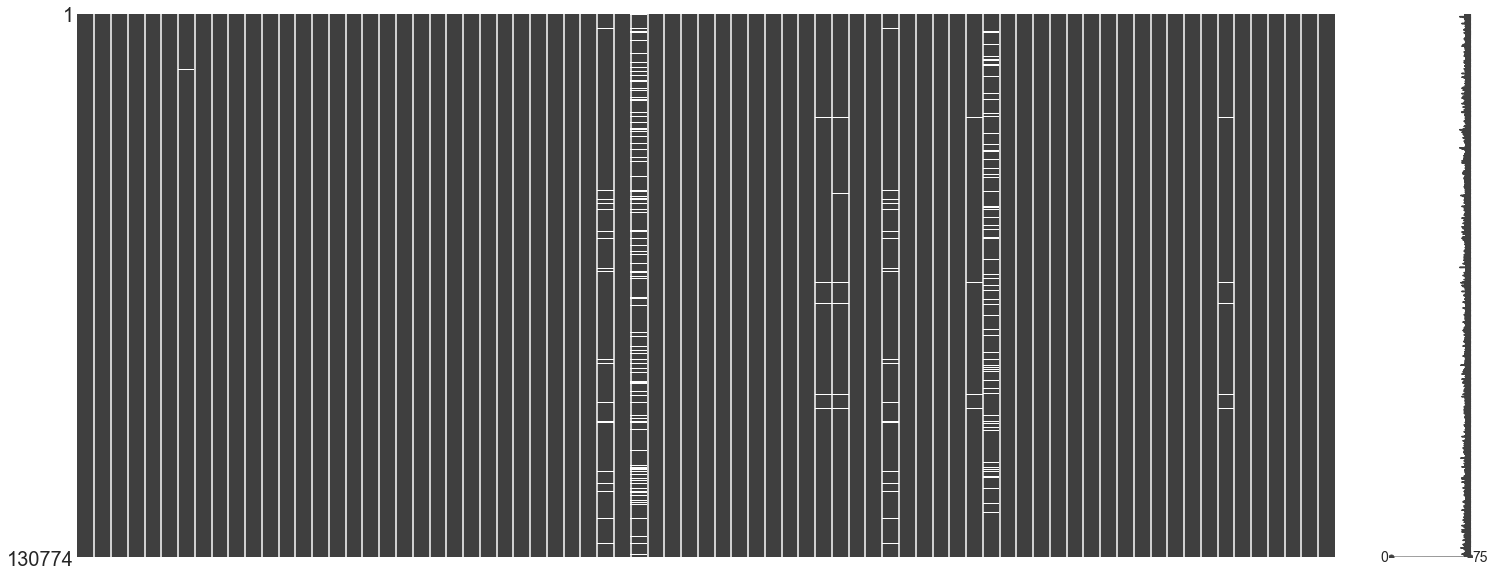

In [185]:
msno.matrix(df[numeric])
plt.show()

In [186]:
# drop rows with all columns is null
df[numeric].dropna(how = 'all', inplace = True)

In [187]:
# Fill NA values with median, most_frequent, or mean
from sklearn.preprocessing import Imputer
im = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0) # column wise
im.fit(df[numeric])
df[numeric] = im.transform(df[numeric])

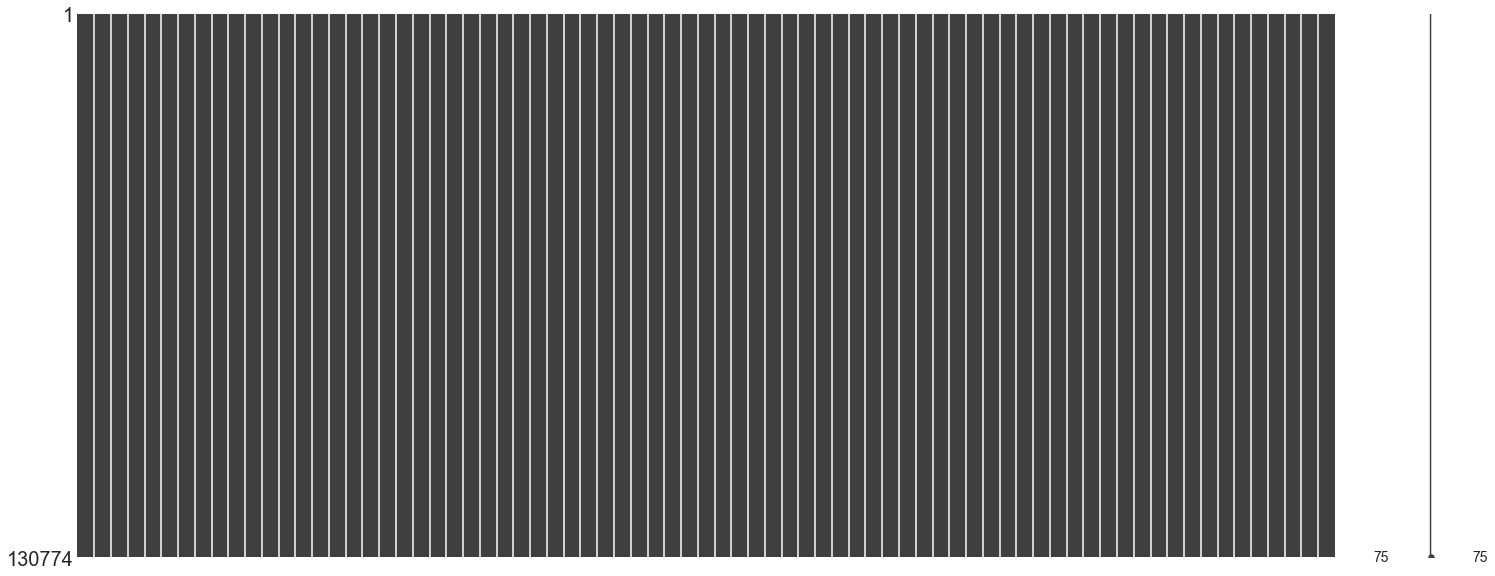

In [188]:
# check missing value again
msno.matrix(df[numeric])
plt.show()

* All missing values have been filled

### Data Filtering

* It is important to determine which variables are irrelevant and should be excluded from the model. For instance, `zip_code` is a variable that we do not want. `sub_grade` and `grade` contains similar information.

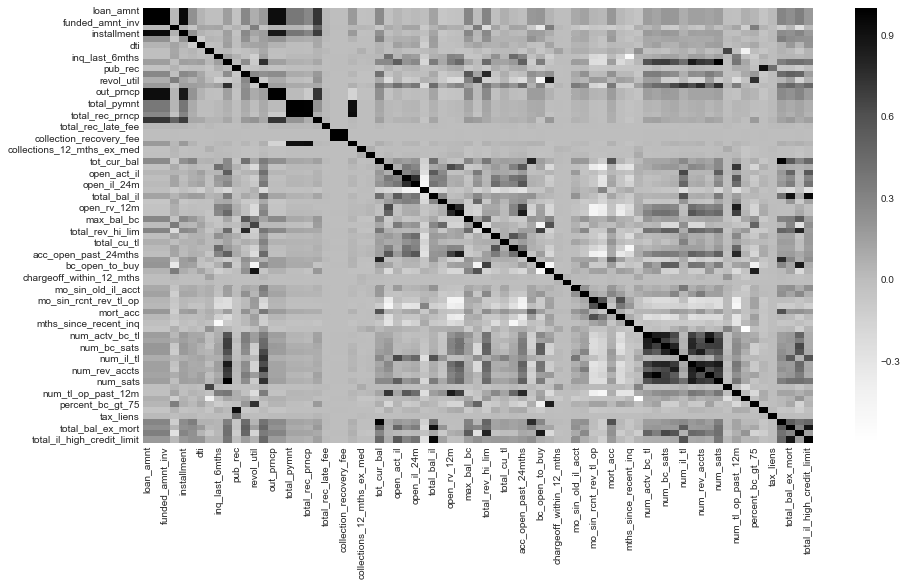

In [189]:
# heatmap for showing correlations between numerical variables
corr = df[numeric].corr()
fig, axes = plt.subplots(figsize = (15,8))
sns.heatmap(corr, cmap = 'Greys')
plt.show()

In [190]:
for name in categorical:
    print('\nFrequency Count for vairables {0}'.format(name))
    print(df[name].value_counts())


Frequency Count for vairables term
 36 months    91506
 60 months    39266
unknown           2
Name: term, dtype: int64

Frequency Count for vairables grade
B          38246
C          35512
A          33016
D          18544
E           4349
F            923
G            182
unknown        2
Name: grade, dtype: int64

Frequency Count for vairables sub_grade
B4         8575
B5         8202
B2         7913
C1         7913
B1         7795
A4         7712
C2         7181
C3         7094
C4         6857
A3         6857
C5         6467
A1         6236
A5         6223
A2         5988
B3         5761
D1         4338
D2         4073
D3         3651
D4         3333
D5         3149
E5         1280
E3          966
E4          853
E1          682
E2          568
F1          481
G1          154
F2          138
F3          112
F5          104
F4           88
G2           12
G3            9
G5            4
G4            3
unknown       2
Name: sub_grade, dtype: int64

Frequency Count for vairables em

Name: last_credit_pull_d, dtype: int64

Frequency Count for vairables application_type
Individual    112685
Joint App      18087
unknown            2
Name: application_type, dtype: int64

Frequency Count for vairables hardship_flag
N          130767
Y               5
unknown         2
Name: hardship_flag, dtype: int64

Frequency Count for vairables disbursement_method
Cash         116353
DirectPay     14419
unknown           2
Name: disbursement_method, dtype: int64

Frequency Count for vairables debt_settlement_flag
N          130768
Y               4
unknown         2
Name: debt_settlement_flag, dtype: int64


* `sub_grade`: repeated information, similar variable to `grade`
* `emp_title`: 10664 unknown values, and there are too many categories
* `issue_d`: Not known before loan issued
* `pymnt_plan`: Almost all no
* `title`: Similar to purpose
* `zip_code`: Not useful
* `addr_state`: Can be excluded because it does not reflect a candidate ability to repay debt
* `last_pymnt_d`, `next_pymnt_d` : not knownn before loan issued
* `hardship_flag`: Almost all No
* `debt_settlement_flag`: Almost all No

In [191]:
# delete variables that are not relevant
exclude = ['sub_grade', 'emp_title', 'issue_d', 'pymnt_plan', 'zip_code', 
           'title','addr_state', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
           'last_credit_pull_d','hardship_flag', 'debt_settlement_flag']
df.drop(exclude, axis = 1, inplace = True)

In [192]:
df.select_dtypes(include = ['object']).shape

(130774, 10)

* There are 10 categorical variables left

In [193]:
df[numeric].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000
mean,15908.82758,15908.82758,15905.58109,12.56098,463.12053,78665.13218,19.28753,0.23520,0.44739,11.44259,0.13324,15531.62358,43.41945,22.47281,14084.94185,14082.12315,2400.30417,2399.77774,1807.76636,592.35924,0.15061,0.02796,0.00503,1041.57651,0.01749,196.19348,140239.85625,0.88572,2.67345,0.68215,1.51618,21.54394,34879.27131,68.30087,1.27823,2.73277,5575.07755,54.06658,36963.60877,1.10810,1.46270,2.02756,4.52704,13461.56736,14467.05487,49.56075,0.00664,1.57463,122.29770,172.21588,14.84687,8.73517,1.30648,25.17894,7.42094,0.48452,3.55247,5.30125,4.76456,7.01179,8.12114,8.14211,12.84767,5.26964,11.42109,0.06119,2.09133,94.42794,32.66970,0.12408,0.00905,180023.71279,50716.80032,25425.28461,44900.20730
std,10129.77148,10129.77148,10128.87309,5.10058,286.19739,87534.42608,19.45389,0.74696,0.72283,5.98123,0.37197,22713.72611,24.98845,12.15693,9775.89921,9775.07032,3764.19315,3763.58658,3690.61444,509.33344,2.52288,7.72141,1.38985,3453.44438,0.14530,1599.12113,162248.56925,1.12418,2.95305,0.93823,1.56515,25.73271,44702.02828,21.68879,1.53862,2.64872,6431.27066,21.32012,37847.79283,1.54623,2.64821,2.45404,3.31291,16935.62139,19021.90015,29.07601,0.08789,192.46873,54.39415,100.10125,18.49673,9.59605,1.68033,33.25702,5.67719,1.38775,2.39978,3.43365,3.12668,4.49024,7.40410,4.95529,7.89437,3.37863,5.97570,0.41973,1.93588,9.27267,34.88151,0.33717,0.15137,182544.43557,52472.55634,25327.30906,47136.46592
min,1000.00000,1000.00000,1000.00000,5.31000,30.12000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,0

* `loan_amnt`: Loan amount
* `int_rate`: interest rate associated with loan
* `annual_inc`: annual income
* `dti`: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
* `delinq_2yrs`: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years!
* `inq_last_6mths`: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
* `open_acc`: The number of open credit lines in the borrower's credit file.
* `pub_rec`:Number of derogatory public records!
* etc.

### Feature Engineering

#### 1. Generate New Features

In [356]:
df['installment_feat'] = df['installment'] / (df['annual_inc'] / 12) 

df['installment_feat'][df['installment_feat'] == float('Inf')] = np.mean(df['installment_feat'][df['installment_feat'] != float('Inf')])

* We compute the ratio of installment over 1/12 of annual income, the higher the ratio, the more responsbility a borrower needs to repay the debt each month

#### 2. Feature Extraction

In [195]:
df = df[df['loan_status'] != 'unknown']

In [196]:
# convert to binary coding for loan status
map_dict = {
    'loan_status':
        {'Current':0, 'Fully Paid':0,'In Grace Period':1, 
         'Late (16-30 days)':1, 'Late (31-120 days)':1, 'Charged Off':1}
}

df = df.replace(map_dict)

In [197]:
df.loan_status.value_counts()

0    128129
1      2643
Name: loan_status, dtype: int64

In [198]:
count = [i for i in df.loan_status.value_counts()]
attr = ['Normal','Default']
pie = Pie('Percentage of Default loans')
pie.add('', attr, count, is_label_show = True)
pie

In [199]:
df.select_dtypes(include = ['object']).describe().T

,count,unique,top,freq
term,130772,2,36 months,91506
grade,130772,7,B,38246
emp_length,130772,12,10+ years,43815
home_ownership,130772,4,MORTGAGE,61720
verification_status,130772,3,Source Verified,53100
purpose,130772,12,debt_consolidation,64141
earliest_cr_line,130772,640,Aug-2006,1118
application_type,130772,2,Individual,112685
disbursement_method,130772,2,Cash,116353


#### Ordinal Values

* `grade`: LC assigned loan grade!
* `emp_length`: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

#### Nominal Values

* `term`: The number of payments on the loan. Values are in months and can be either 36 or 60.
* `home_ownership`:The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER!
* `verfication_status`:Indicates if income was verified by LC, not verified, or if the income source was verified!
* `purpose`:A category provided by the borrower for the loan request. 
* `application_type`:Indicates whether the loan is an individual application or a joint application with two co-borrowers!

In [218]:
map_dict = {
    'emp_length':{
        '10+ years':1,
        '9 years':9,
        '8 years':8,
        '7 years':7,
        '6 years':6,
        '5 years':5,
        '4 years':4,
        '3 years':3,
        '2 years':2,
        '1 year':1,
        '< 1 year':0,
        'n/a':0
    },
    'grade':{
        'A':1,
        "B":2,
        'C':3,
        'D':4,
        'E':5,
        'F':6,
        'G':7
    }
}

df = df.replace(map_dict)

#### One-Hot enconding for Nominal Values

* `home_ownership`

In [228]:
df['home_ownership'].value_counts()

MORTGAGE    61720
RENT        52131
OWN         16921
Name: home_ownership, dtype: int64

In [227]:
# replace 'ANY' with 'OWN'
df['home_ownership'].replace('ANY','OWN', inplace = True)

* `purpose`

In [231]:
df['purpose'].value_counts()

debt_consolidation    64141
credit_card           32822
other                 11309
home_improvement       9652
major_purchase         3763
house                  2240
medical                1958
car                    1525
small_business         1243
vacation               1115
moving                  932
renewable_energy         72
Name: purpose, dtype: int64

In [234]:
# group purpose
map_list = {
    'house':'home_improvement',
    'medical':'other',
    'car':'other',
    'small_business':'other',
    'vacation':'other',
    'moving':'home_improvement',
    'renewable_energy':'other'
}

df['purpose'].replace(map_list, inplace = True)

In [236]:
df['purpose'].value_counts()

debt_consolidation    64141
credit_card           32822
other                 17222
home_improvement      12824
major_purchase         3763
Name: purpose, dtype: int64

In [244]:
df.select_dtypes(include = ['object']).describe().T

,count,unique,top,freq
term,130772,2,36 months,91506
home_ownership,130772,3,MORTGAGE,61720
verification_status,130772,3,Source Verified,53100
purpose,130772,5,debt_consolidation,64141
earliest_cr_line,130772,640,Aug-2006,1118
application_type,130772,2,Individual,112685
disbursement_method,130772,2,Cash,116353


* `earliest_cr_line`

In [359]:
# extract years from earliest credit line
df['earliest_cr_line'] = df['earliest_cr_line'].str[-4:]
df['earliest_cr_line'].value_counts().sort_index()

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [284]:
df['earliest_cr_line'].astype(int).describe()

count   130772.00000
mean      2001.91834
std          7.85687
min       1955.00000
25%       1998.00000
50%       2004.00000
75%       2007.00000
max       2015.00000
Name: earliest_cr_line, dtype: float64

In [288]:
def credit_line(val):
    if val < 1998:
        return 1
    elif val < 2004:
        return 2
    elif val < 2007:
        return 3
    else:
        return 4
    
df['earliest_cr_line'] = df['earliest_cr_line'].astype(int).apply(credit_line)

In [292]:
cols = ['term', 'home_ownership','verification_status', 'purpose', 'application_type', 'disbursement_method']
dummy_df = pd.get_dummies(df[cols])

df = pd.concat([df, dummy_df], axis = 1)

In [315]:
df = df.drop(cols, axis = 1)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,installment_feat,term_ 36 months,term_ 60 months,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_other,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay
0,10000.00000,10000.00000,10000.00000,20.39000,373.63000,4,3,26000.00000,0,56.00000,0.00000,3,0.00000,10.00000,0.00000,35130.00000,98.40000,16.00000,9589.10000,9589.10000,741.60000,741.60000,410.90000,330.70000,0.00000,0.00000,0.00000,373.63000,0.00000,0.00000,64253.00000,1.00000,3.00000,0.00000,1.00000,23.00000,29123.00000,69.00000,1.00000,6.00000,1103.00000,82.00000,35700.00000,0.00000,0.00000,1.00000,7.00000,6425.00000,133.00000,94.00000,0.00000,0.00000,158.00000,37.00000,1.00000,1.00000,1.00000,20.00000,12.00000,0.00000,2.00000,7.00000,2.00000,2.00000,7.00000,7.00000,8.00000,7.00000,10.00000,0.00000,1.00000,100.00000,100.00000,0.00000,0.00000,78151.00000,64253.00000,2200.00000,42451.00000,0.17244,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0
1,20000.00000,20000.00000,20000.00000,13.06000,455.68000,3,6,94000.00000,0,22.29000,1.00000,2,0.00000,12.00000,0.00000,51762.00000,69.90000,16.00000,19521.38000,19521.38000,882.34000,882.34000,478.62000,403.72000,0.00000,0.00000,0.00000,455.68000,0.00000,0.00000,520838.00000,0.00000,1.00000,0.00000,0.00000,27.00000,17705.00000,70.00000,0.00000,1.00000,21516.00000,70.00000,74000.00000,0.00000,0.00000,1.00000,2.00000,43403.00000,10021.00000,82.00000,0.00000,0.00000,49.00000,213.00000,14.00000,8.00000,1.00000,14.00000,9.00000,0.00000,6.00000,10.00000,6.00000,6.00000,2.00000,10.00000,13.00000,10.00000,12.00000,0.00000,1.00000,93.80000,50.00000,0.00000,0.00000,554201.00000,69467.00000,55700.00000,25201.00000,0.05817,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1
2,14000.00000,14000.00000,14000.00000,10.56000,301.34000,2,8,98000.00000,0,16.02000,0.00000,3,0.00000,12.00000,0.00000,21930.00000,32.30000,16.00000,13642.15000,13642.15000,586.25000,586.25000,357.85000,228.40000,0.00000,0.00000,0.00000,301.34000,0.00000,0.00000,188168.00000,1.00000,3.00000,2.00000,2.00000,10.00000,54827.00000,89.00000,1.00000,1.00000,9202.00000,54.00000,68000.00000,1.00000,1.00000,1.00000,3.00000,17106.00000,41570.00000,34.50000,0.00000,0.00000,142.00000,156.00000,4.00000,4.00000,1.00000,4.00000,9.00000,0.00000,5.00000,5.00000,7.00000,7.00000,6.00000,8.00000,9.00000,5.00000,12.00000,0.00000,3.00000,100.00000,16.70000,0.00000,0.00000,277254.00000,76757.00000,63500.00000,79008.00000,0.03690,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0
3,8000.00000,8000.00000,8000.00000,6.83000,246.40000,1,2,144000.00000,0,22.23000,0.00000,2,0.00000,15.00000,0.00000,2851.00000,7.40000,34.00000,7597.12000,7597.12000,486.73000,486.73000,402.88000,83.8

In [316]:
df.shape

(130772, 97)

#### 3. Feature Scaling

* Feature scaling is the process of normalizing or standardizing the variables so that they have the same scale. This is to ensure each variable contributes to the model at the same scale.

In [305]:
col = df.select_dtypes(['float64', 'int64']).columns
len(col)

80

* 80 numerical features

In [358]:
# col = col.drop('loan_status') # drop target variable
loan_df = df

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
loan_df[col] = sc.fit_transform(loan_df[col])
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,installment_feat,term_ 36 months,term_ 60 months,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_other,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay
0,-0.58331,-0.58331,-0.58304,1.53492,-0.31269,1.34628,0.21714,-0.60165,0,1.88715,-0.31488,0.40537,-0.61894,-0.24119,-0.35819,0.86284,2.20023,-0.53244,-0.45989,-0.45964,-0.44065,-0.44058,-0.37849,-0.51373,-0.05970,-0.00362,-0.00362,-0.19341,-0.12036,-0.12269,-0.46833,0.10166,0.11058,-0.72706,-0.32980,0.05658,-0.12877,0.03223,-0.18083,1.23351,-0.69536,1.31019,-0.03339,-0.71664,-0.55233,-0.41872,0.74646,-0.41549,-0.75355,1.52838,-0.07552,-0.00818,0.65636,-1.35079,-0.74861,-0.80607,-0.18239,-0.15572,0.80657,-0.34914,-0.64692,0.49473,-0.88418,-1.11615,-0.15142,-0.23048,-0.61407,0.51215,-0.23781,-0.14579,-0.56374,0.60091,1.93025,-0.36800,-0.05976,-0.55807,0.25797,-0.91700,-0.05196,-0.00282,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0
1,0.40387,0.40387,0.40423,0.09784,-0.02600,0.48458,1.45128,0.17519,0,0.15434,1.02387,-0.48432,-0.61894,0.09319,-0.35819,1.59508,1.05971,-0.53244,0.55610,0.55644,-0.40326,-0.40319,-0.36014,-0.37036,-0.05970,-0.00362,-0.00362,-0.16966,-0.12036,-0.12269,2.34576,-0.78787,-0.56668,-0.72706,-0.96871,0.21203,-0.38419,0.07834,-0.83076,-0.65419,2.47865,0.74734,0.97856,-0.71664,-0.55233,-0.41872,-0.76278,1.76795,-0.23373,1.11567,-0.07552,-0.00818,-1.34752,0.40743,-0.04578,-0.07661,-0.18239,-0.33614,0.27814,-0.34914,1.01990,1.36844,0.39513,-0.22533,-0.82672,0.37493,0.01930,1.40008,0.09688,-0.14579,-0.56374,-0.06772,0.49683,-0.36800,-0.05976,2.04978,0.35733,1.19533,-0.41792,-0.00678,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1
2,-0.18844,-0.18844,-0.18813,-0.39230,-0.56527,-0.37713,2.27405,0.22088,0,-0.16796,-0.31488,0.40537,-0.61894,0.09319,-0.35819,0.28170,-0.44498,-0.53244,-0.04529,-0.04501,-0.48192,-0.48186,-0.39286,-0.71458,-0.05970,-0.00362,-0.00362,-0.21435,-0.12036,-0.12269,0.29540,0.10166,0.11058,1.40461,0.30912,-0.44861,0.44624,0.95437,-0.18083,-0.65419,0.56395,-0.00312,0.82003,-0.06991,-0.17472,-0.41872,-0.46093,0.21519,1.42482,-0.51798,-0.07552,-0.00818,0.36221,-0.16199,-0.58642,-0.49345,-0.18239,-0.63682,0.27814,-0.34914,0.60319,-0.08773,0.71495,-0.00263,-0.28648,-0.02868,-0.48739,-0.07981,0.09688,-0.14579,0.46938,0.60091,-0.45783,-0.36800,-0.05976,0.53264,0.49626,1.50330,0.72359,-0.00752,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0
3,-0.78075,-0.78075,-0.78050,-1.12359,-0.75724,-1.23884,-0.19425,0.74639,0,0.15125,-0.31488,-0.48432,-0.61894,0.59476,-0.35819,-0.55828,-1.44144,0.94820,-0.66365,-0.66342,-0.50836,-0.50830,-0.38066,-0.99838,-0.05970,-0.00362,-0.00362,-0.23026,-0.12036,-0.12269,1.70352,0.10166,1.12647,1

#### 4. Feature Selection

* The process of choosing variables that have the most correlation with target variable. Remove irrelevant variables to reduce model complexity and noise.

* **Filter Approach**: Based on correlation between independent and dependent variable

* **Embedded approach**: Model based variable selection method

* **Wrapper approach**: AUC/MSE to determine whether a variable should be included

In [372]:
X = loan_df.drop('loan_status', axis = 1)
y = loan_df['loan_status']

* **Wrapper**: Use recursive feature elimination (RFE) to select 30 variables that have highest correlation with target variable, for the purpose of dimensionality reduction

In [379]:
# Wrapper
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
rfe = RFE(lr, 30)
rfe = rfe.fit(X, y)

print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True False False False False False False
  True False False False False  True  True  True  True  True  True False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False  True  True False False False False
 False False False False False False False  True  True  True  True  True
  True  True  True  True False False False False  True  True  True  True]
[ 1  1  1  1  1  1 37 58 36 46 63  7  1  5 51 55 17  1  1  1  1  1  1  3
 40 53  1 44 66 21 41 61 57 15 62 25 24 31 14 42 23 27 48 28 29  9 22 65
 32 64 12 34 50 60 45 56 52 16 39 43  1 59 18 20 47 13  1  1 49 30 54 33
  4  6 35 26 19 67  8  1  1  1  1  1  1  1  1  1  2 10 38 11  1  1  1  1]


In [386]:
col_wrapper = X.columns[rfe.support_]
col_wrapper

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'open_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_amnt', 'num_actv_rev_tl', 'num_rev_tl_bal_gt_0', 'num_sats',
       'term_ 36 months', 'term_ 60 months', 'home_ownership_MORTGAGE',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'application_type_Individual',
       'application_type_Joint App', 'disbursement_method_Cash',
       'disbursement_method_DirectPay'],
      dtype='object')

In [401]:
len(col_wrapper)

30

* **Filter**: Pearson Correlation plot for variable selection

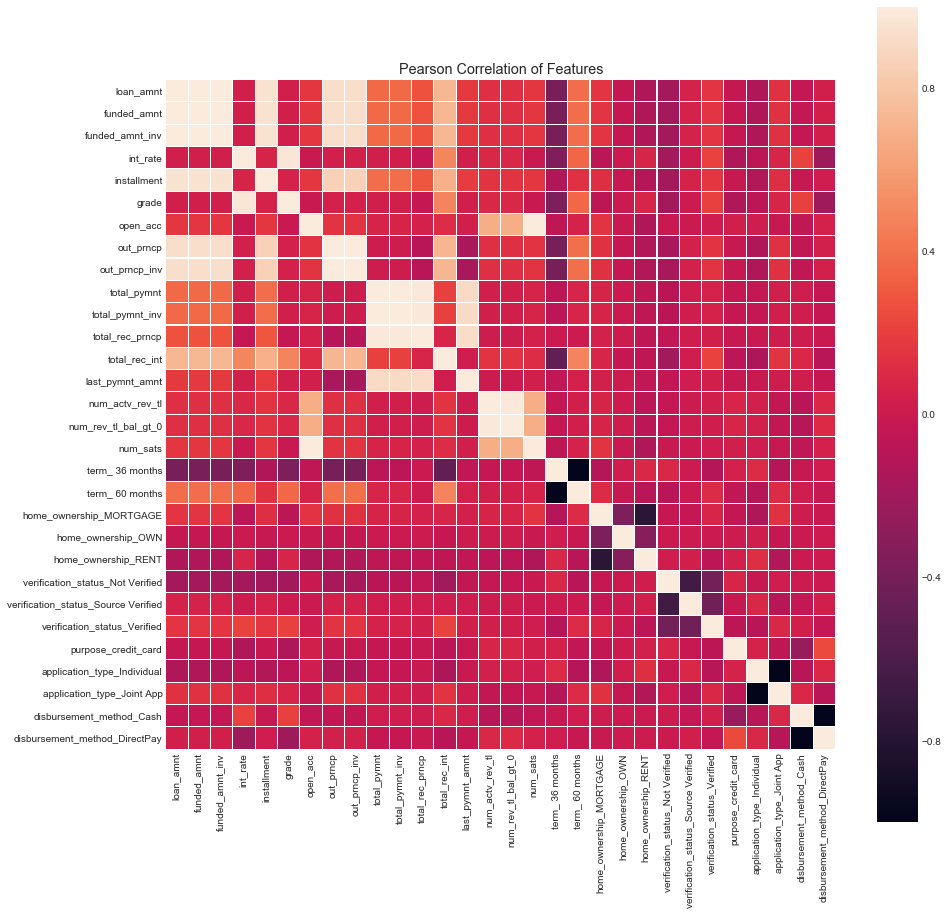

In [403]:
fig, axes = plt.subplots(figsize = (15,15))
plt.title("Pearson Correlation of Features")
sns.heatmap(loan_df[col_wrapper].corr(), square = True, linewidths = 0.1, vmax = 1.0)
plt.show()

In [405]:
exclude = ['funded_amnt', 'funded_amnt_inv', 'installment', 'out_prncp', 'out_prncp_inv',
          'total_pymnt_inv', 'total_rec_prncp','last_pymnt_amnt', 'num_rev_tl_bal_gt_0',
          'num_sats']

col_filter = col_wrapper.drop(exclude)
col_filter

Index(['loan_amnt', 'int_rate', 'grade', 'open_acc', 'total_pymnt',
       'total_rec_int', 'num_actv_rev_tl', 'term_ 36 months',
       'term_ 60 months', 'home_ownership_MORTGAGE', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'application_type_Individual',
       'application_type_Joint App', 'disbursement_method_Cash',
       'disbursement_method_DirectPay'],
      dtype='object')

In [406]:
len(col_filter)

20

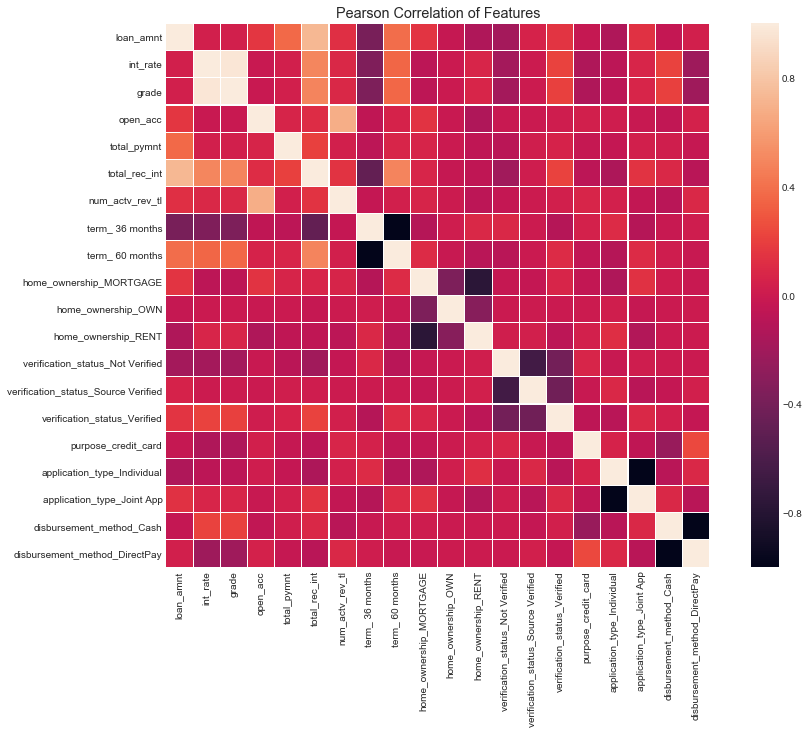

In [407]:
fig, axes = plt.subplots(figsize = (15,10))
plt.title("Pearson Correlation of Features")
sns.heatmap(loan_df[col_filter].corr(), square = True, linewidths = 0.1, vmax = 1.0)
plt.show()

* **Embedded** : Use Random Forest for feature importance plot

In [435]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 5, random_state = 123)
rf.fit(X[col_filter], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

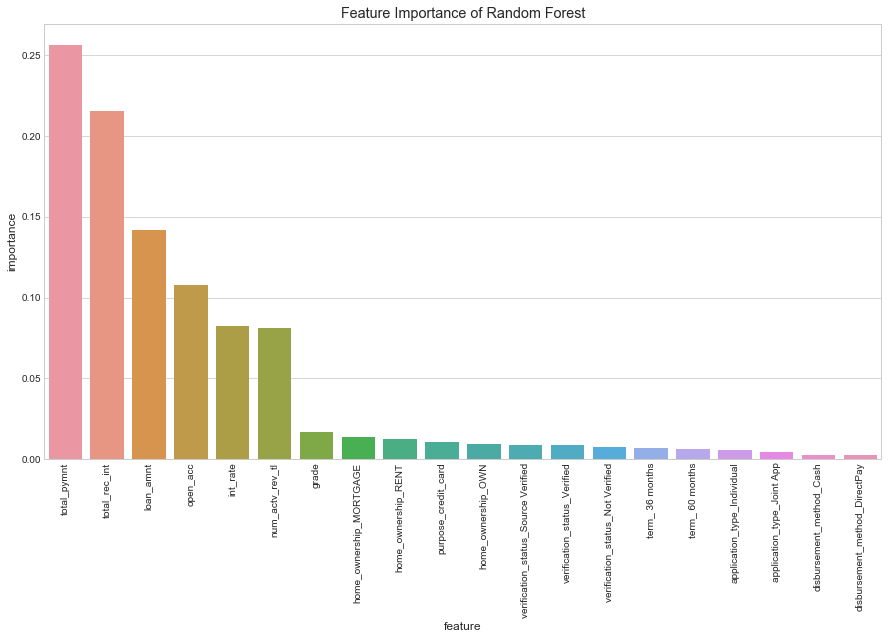

In [436]:
impor = pd.DataFrame({
    'feature': col_filter,
    'importance': rf.feature_importances_
})
impor = impor.sort_values('importance', ascending = False)

fig, axes = plt.subplots(figsize = (15,8))
sns.barplot(x = 'feature', y = 'importance', data = impor)
plt.xticks(rotation = 90)
plt.title('Feature Importance of Random Forest')
plt.show()

* Random Forest tends to favor variables with more categories if we use impurity to measure importance of variables. This creates a bias.

### Model Training

In [439]:
print(y.value_counts())

0    128129
1      2643
Name: loan_status, dtype: int64


* Most machine learning classification algorithms are sensitive to unbalance in the predictor classes. In our case, only 2% of the cases are default. A naive model that predicts all cases as non-fraud will give a high accuracy of 98% percent. However, such a model is useless to us. An unbalanced dataset will bias the prediction model towards the more common class. Therefore, we need to look at other metrics such as precision, recall, F1-score to evaluate model performance.

* There are in general two ways to address unbalance:
    * **Oversampling**: Increase fraud cases
    * **Undersamling**: Reduce some of the normal cases

#### Oversampling - SMOTE (Synthetic Minority Oversampling Technique)

* Finding the k-nearest-neighbors for minority class observations (finding similar observations)
* Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observation.

In [573]:
X = loan_df[col_filter]
y = loan_df['loan_status']

print('sample size: {}; Fraud: {:.2%}; Normal :{:.2%}'.format(X.shape[0], 
                                                              y[y == 1].shape[0] / X.shape[0],
                                                              y[y == 0].shape[0] / X.shape[0]))
print('Variable Size: {}'.format(X.shape[1]))

sample size: 130772; Fraud: 2.02%; Normal :97.98%
Variable Size: 20


In [574]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

# split dataset into 90% training and 10% testing
training_X, testing_X, training_y, testing_y = train_test_split(X,
                                                    y,
                                                    test_size = 0.1,
                                                   random_state = 42)

In [575]:
X_train, X_test, y_train, y_test = train_test_split(training_X, 
                                                    training_y,
                                                   test_size = 0.1,
                                                   random_state = 42)

from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state = 42)
X_smote, y_smote = sm.fit_sample(X_train, y_train)

print("After SMOTE to balance pos and neg cases:")
print('sample size: {}; Fraud: {:.2%}; Normal: {:.2%}'.format(
    X_smote.shape[0],
    y_smote[y_smote == 1].shape[0] / X_smote.shape[0],
    y_smote[y_smote == 0].shape[0] / X_smote.shape[0]
))

After SMOTE to balance pos and neg cases:
sample size: 207578; Fraud: 50.00%; Normal: 50.00%


In [576]:
lr1 = LogisticRegression()
lr1.fit(X_smote, y_smote)

print('Validation Result')
print('Accuracy:',accuracy_score(y_test, lr1.predict(X_test), ))
print('Recall',recall_score(y_test, lr1.predict(X_test)))

print('Test Result')
print('Accuracy',accuracy_score(testing_y, lr1.predict(testing_X)))
print('Recall',recall_score(testing_y, lr1.predict(testing_X)))

Validation Result
Accuracy: 0.7454545454545455
Recall 0.7166666666666667
Test Result
Accuracy 0.7423918030279859
Recall 0.6604477611940298


* **Confusion Matrix**

In [577]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(testing_y, lr1.predict(testing_X))
m

array([[9532, 3278],
       [  91,  177]])

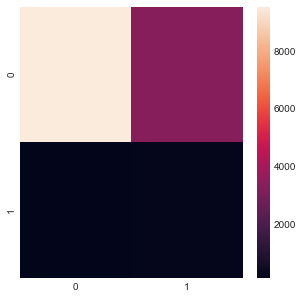

In [578]:
plt.figure(figsize = (5,5))
sns.heatmap(m)
plt.show()

* **Classification Report**

In [592]:
from sklearn.metrics import classification_report
print("Validation Set")
print(classification_report(y_test, lr1.predict(X_test)))

print("Testing Set")
print(classification_report(testing_y, lr1.predict(testing_X)))

Validation Set
             precision    recall  f1-score   support

          0       0.99      0.75      0.85     11530
          1       0.06      0.72      0.10       240

avg / total       0.97      0.75      0.84     11770

Testing Set
             precision    recall  f1-score   support

          0       0.99      0.74      0.85     12810
          1       0.05      0.66      0.10       268

avg / total       0.97      0.74      0.83     13078



* **ROC Curve**

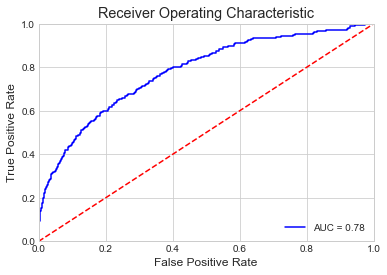

In [580]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# calculate the fpr and tpr for all thresholds of the classification
probs = lr1.predict_proba(testing_X)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(testing_y, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Model evaludation and optimzation

* Bootstraping
* Cross-validation
* Hold-out

In [581]:
from sklearn.model_selection import GridSearchCV

# Use L1 and L2 regularization to prevent overfitting
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'penalty':['l1','l2']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid_search.fit(X_smote, y_smote)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [587]:
results = pd.DataFrame(grid_search.cv_results_)
best = np.argmax(results.mean_test_score.values)

print('Best Parameter:{}'.format(grid_search.best_params_))
print('Best cross-validation score: {:.5f}'.format(grid_search.best_score_))

Best Parameter:{'C': 1, 'penalty': 'l1'}
Best cross-validation score: 0.72806


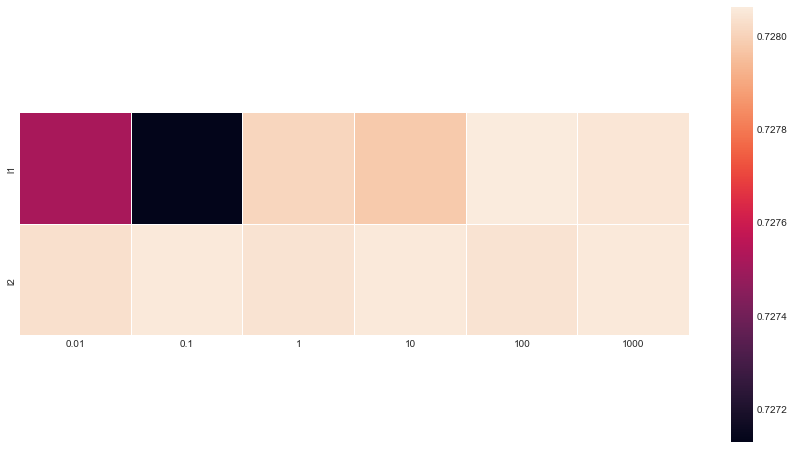

In [588]:
plt.figure(figsize = (15,8))
scores = np.array(results.mean_test_score).reshape(2,6)
sns.heatmap(scores, yticklabels = param_grid['penalty'], xticklabels = param_grid['C'], linewidths = 0.1, square = True)
plt.show()

In [589]:
y_pred = grid_search.predict(testing_X)

In [590]:
print(classification_report(testing_y, y_pred))

             precision    recall  f1-score   support

          0       0.99      0.74      0.85     12810
          1       0.05      0.66      0.10       268

avg / total       0.97      0.74      0.83     13078



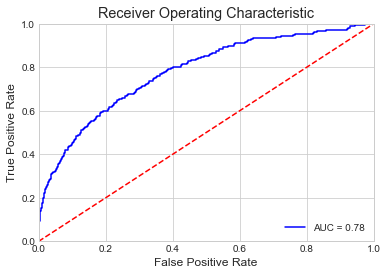

In [591]:
# calculate the fpr and tpr for all thresholds of the classification
probs = grid_search.predict_proba(testing_X)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(testing_y, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

* Grid Search does not really improve our model in this case. We can use more advanced model to improve prediction